# 3.a Model Development (Close)

In [2]:
import numpy as np
import math
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import boto3 
import io  
from sagemaker import get_execution_role
role = get_execution_role()
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
role

'arn:aws:iam::190183093544:role/service-role/AmazonSageMaker-ExecutionRole-20220602T141236'

In [4]:
session = boto3.Session()

### Load the Data from S3

In [5]:
bucket='data-aman-use-case'  
file_key = 'x_train_close.npy' 
  
s3_client = boto3.client('s3')  
obj = s3_client.get_object(Bucket=bucket, Key=file_key)  
x_train_close = np.load(io.BytesIO(obj['Body'].read()))  

/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


In [6]:
bucket='data-aman-use-case'  
file_key = 'x_test_close.npy' 
  
s3_client = boto3.client('s3')  
obj = s3_client.get_object(Bucket=bucket, Key=file_key)  
x_test_close = np.load(io.BytesIO(obj['Body'].read()))  

In [7]:
bucket='data-aman-use-case'  
file_key = 'y_train_close.npy' 
  
s3_client = boto3.client('s3')  
obj = s3_client.get_object(Bucket=bucket, Key=file_key)  
y_train_close = np.load(io.BytesIO(obj['Body'].read()))  

In [8]:
bucket='data-aman-use-case'  
file_key = 'y_test_close.npy' 
  
s3_client = boto3.client('s3')  
obj = s3_client.get_object(Bucket=bucket, Key=file_key)  
y_test_close = np.load(io.BytesIO(obj['Body'].read()))  

### Building the LSTM RNN Model for close prices

In [13]:

model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train_close.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 60, 100)           40800     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 25)                2525      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [14]:
"""
regressor = keras.Sequential()
# LSTM layer 1
regressor.add(layers.LSTM(units = 50, return_sequences=True, input_shape = (x_train_close.shape[1], 1)))
regressor.add(layers.Dropout(0.2))
# LSTM layer 2,3,4
regressor.add(layers.LSTM(units = 50, return_sequences=True))
regressor.add(layers.Dropout(0.2))
regressor.add(layers.LSTM(units = 50, return_sequences=True))
regressor.add(layers.Dropout(0.2))
regressor.add(layers.LSTM(units = 50, return_sequences=True))
regressor.add(layers.Dropout(0.2))
regressor.add(layers.LSTM(units = 50, return_sequences=True))
regressor.add(layers.Dropout(0.2))
# LSTM layer 5
regressor.add(layers.LSTM(units = 50))
regressor.add(layers.Dropout(0.2))
# Fully connected layer
regressor.add(layers.Dense(units = 1))
regressor.summary()
"""

'\nregressor = keras.Sequential()\n# LSTM layer 1\nregressor.add(layers.LSTM(units = 50, return_sequences=True, input_shape = (x_train_close.shape[1], 1)))\nregressor.add(layers.Dropout(0.2))\n# LSTM layer 2,3,4\nregressor.add(layers.LSTM(units = 50, return_sequences=True))\nregressor.add(layers.Dropout(0.2))\nregressor.add(layers.LSTM(units = 50, return_sequences=True))\nregressor.add(layers.Dropout(0.2))\nregressor.add(layers.LSTM(units = 50, return_sequences=True))\nregressor.add(layers.Dropout(0.2))\nregressor.add(layers.LSTM(units = 50, return_sequences=True))\nregressor.add(layers.Dropout(0.2))\n# LSTM layer 5\nregressor.add(layers.LSTM(units = 50))\nregressor.add(layers.Dropout(0.2))\n# Fully connected layer\nregressor.add(layers.Dense(units = 1))\nregressor.summary()\n'

### Compiling and fitting the LSTM RNN Model

In [15]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train_close, y_train_close, batch_size= 1, epochs=12)

Epoch 1/12
2216/2216 [==============================] - 68s 31ms/step - loss: 1.6931e-04
Epoch 2/12
2216/2216 [==============================] - 66s 30ms/step - loss: 8.7171e-05
Epoch 3/12
2216/2216 [==============================] - 63s 29ms/step - loss: 8.6133e-05
Epoch 4/12
2216/2216 [==============================] - 64s 29ms/step - loss: 5.2935e-05
Epoch 5/12
2216/2216 [==============================] - 66s 30ms/step - loss: 5.7265e-05
Epoch 6/12
2216/2216 [==============================] - 64s 29ms/step - loss: 5.7784e-05
Epoch 7/12
2216/2216 [==============================] - 64s 29ms/step - loss: 5.0098e-05
Epoch 8/12
2216/2216 [==============================] - 64s 29ms/step - loss: 4.9319e-05
Epoch 9/12
2216/2216 [==============================] - 67s 30ms/step - loss: 4.5039e-05
Epoch 10/12
2216/2216 [==============================] - 64s 29ms/step - loss: 4.5707e-05
Epoch 11/12
2216/2216 [==============================] - 64s 29ms/step - loss: 4.7181e-05
Epoch 12/12
2216/22

### Scaling values in local env

In [16]:
btc = f'https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1=1410912000&period2=1656633600&interval=1d&events=history&includeAdjustedClose=true'

In [17]:
data= pd.read_csv(btc, parse_dates=['Date'], index_col=['Date'])

In [18]:
close_prices = data['Close']
values = close_prices.values
training_data_len_close = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data_close = scaler.fit_transform(values.reshape(-1, 1))
train_data_close = scaled_data_close[0: training_data_len_close, :]

x_train_close = []
y_train_close = []

for i in range(60, len(train_data_close)):
    x_train_close.append(train_data_close[i-60:i, 0])
    y_train_close.append(train_data_close[i, 0])
x_train_close, y_train_close = np.array(x_train_close), np.array(y_train_close)
x_train_close = np.reshape(x_train_close, (x_train_close.shape[0], x_train_close.shape[1], 1))

In [19]:
test_data_close = scaled_data_close[training_data_len_close-60: , : ]
x_test_close = []
y_test_close = values[training_data_len_close:]

for i in range(60, len(test_data_close)):
    x_test_close.append(test_data_close[i-60:i, 0])

x_test_close = np.array(x_test_close)
x_test_close = np.reshape(x_test_close, (x_test_close.shape[0], x_test_close.shape[1], 1))

### Making predictions and looking at the RMSE

In [20]:
predictions = model.predict(x_test_close)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test_close)**2)
rmse

2139.0868060391035

### Visualizing model performance

/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


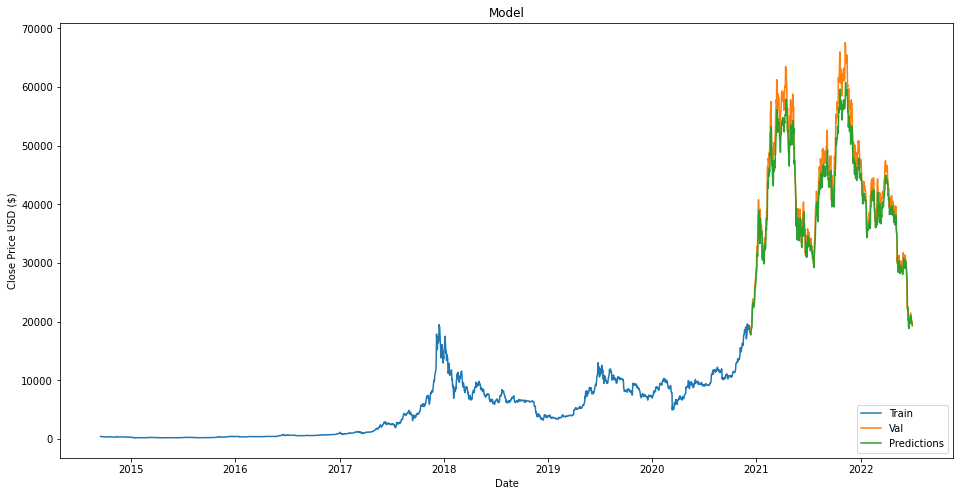

In [21]:
data = data.filter(['Close'])
train = data[:training_data_len_close]
validation = data[training_data_len_close:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()